### 回归是如何变成分类的呢？

之前在线性回归问题中，得到了具体的回归值，如果此时任务要做一个二分类该怎么办呢？

如果可以将连续的数值转换成对应的区间，这样就可以完成分类任务了，逻辑回归中借助sigmoid函数完成了数值映射，通过概率值比较来完成分类任务

In [1]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

### 神奇的sigmoid函数：

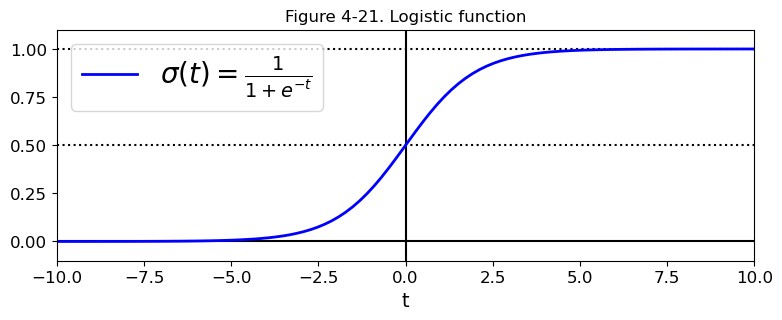

In [2]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.title('Figure 4-21. Logistic function')
plt.show()

### 推导公式：
![title](./img/1.png)

### 鸢尾花数据集：
![title](./img/2.png)

### 加载sklearn内置数据集

In [3]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [4]:
print (iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

**对于传统逻辑回归，要对标签多变换，也就是属于当前类别为1，其他类别为0**

In [5]:
X = iris['data'][:,3:]
y = (iris['target'] == 2).astype(np.int)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [6]:
from sklearn.linear_model import LogisticRegression
log_res = LogisticRegression(C=10000000)
log_res.fit(X,y)

LogisticRegression(C=10000000)

In [7]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_res.predict_proba(X_new)

**随着输入特征数值的变化，结果概率值也会随之变化**

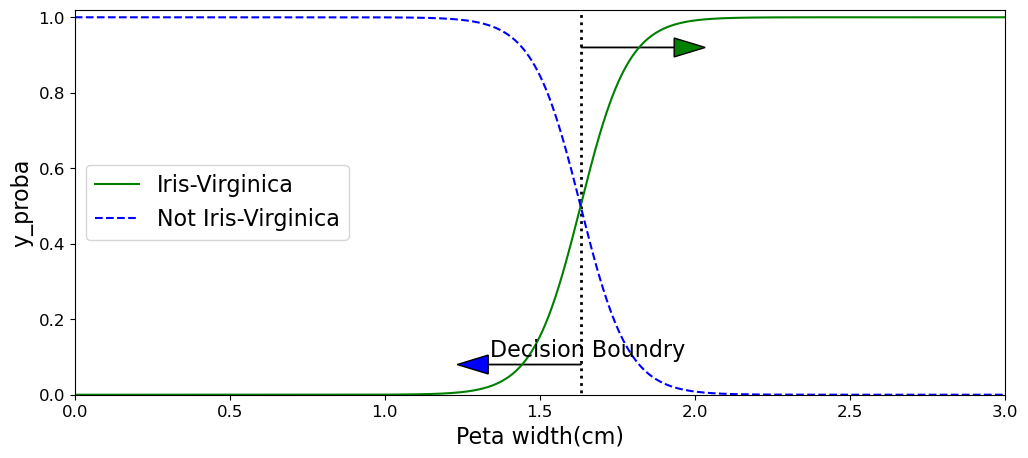

In [8]:
plt.figure(figsize=(12,5))
decision_boundry = X_new[y_proba[:,1] >= 0.5][0]
plt.plot([decision_boundry,decision_boundry],[-1,2],'k:',linewidth=2)
plt.plot(X_new,y_proba[:,1],'g-', label='Iris-Virginica')
plt.plot(X_new,y_proba[:,0],'b--', label='Not Iris-Virginica')
plt.arrow(decision_boundry,0.08,-0.3,0,head_width=0.05,head_length=0.1,fc='b')
plt.arrow(decision_boundry,0.92,0.3,0,head_width=0.05,head_length=0.1,fc='g')
plt.axis([0,3,-0.0,1.02])
plt.text(decision_boundry+0.02,0.1,'Decision Boundry',fontsize=16,color='k',ha='center')
plt.xlabel('Peta width(cm)',fontsize=16)
plt.ylabel('y_proba', fontsize=16)
plt.legend(loc='center left', fontsize=16)
plt.show()

In [9]:
X = iris['data'][:,(2,3)]
y = (iris['target'] == 2).astype(np.int)

In [10]:
log_res = LogisticRegression()
log_res.fit(X,y)

LogisticRegression()

In [11]:
X[:,0].min(),X[:,0].max()

(1.0, 6.9)

In [12]:
X[:,1].min(),X[:,1].max()

(0.1, 2.5)

### 决策边界的绘制：
- 构建坐标数据，合理的范围当中，根据实际训练时输入数据来决定
- 整合坐标点，得到所有测试输入数据坐标点
- 预测，得到所有点的概率值
- 绘制等高线，完成决策边界

构建坐标数据：

In [13]:
x0, x1 = np.meshgrid(np.linspace(2.9,7,500).reshape(-1,1), np.linspace(0.8,2.7,200).reshape(-1,1))

In [14]:
X_new = np.c_[x0.ravel(),x1.ravel()]
X_new

array([[2.9       , 0.8       ],
       [2.90821643, 0.8       ],
       [2.91643287, 0.8       ],
       ...,
       [6.98356713, 2.7       ],
       [6.99178357, 2.7       ],
       [7.        , 2.7       ]])

In [15]:
X_new.shape

(100000, 2)

In [16]:
y_proba = log_res.predict_proba(X_new)

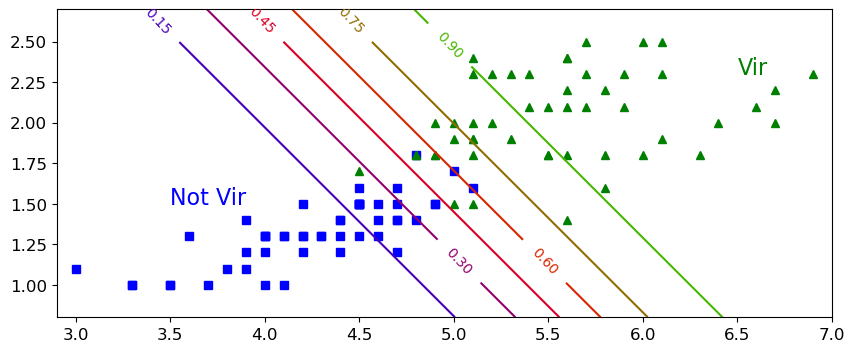

In [17]:
plt.figure(figsize=(10,4))
plt.plot(X[y==0,0], X[y==0,1],'bs')
plt.plot(X[y==1,0], X[y==1,1],'g^')

zz = y_proba[:,1].reshape(x0.shape)
contour = plt.contour(x0,x1,zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1)
plt.axis([2.9,7,0.8,2.7])
plt.text(3.5,1.5,'Not Vir',fontsize=16,color='b')
plt.text(6.5,2.3,'Vir', fontsize=16,color='g')
plt.show()

### 如何进行多类别分类呢？Softmax该登场了

![title](./img/3.png)

#### softmax就是做了一个归一化操作,只不过是向指数函数做了一个映射

In [18]:
X = iris['data'][:,(2,3)]
y = iris['target']

In [19]:
softmax_reg = LogisticRegression(multi_class='multinomial',solver='lbfgs')
softmax_reg.fit(X,y)

LogisticRegression(multi_class='multinomial')

In [20]:
softmax_reg.predict_proba([[5,2]])

array([[2.43559894e-04, 2.14859516e-01, 7.84896924e-01]])

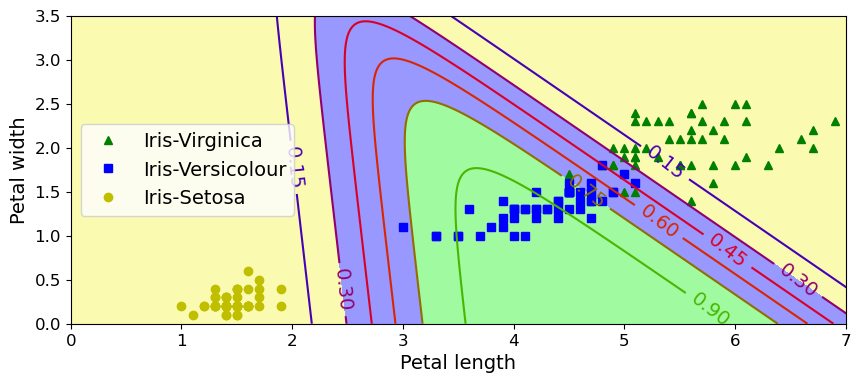

In [21]:
x0, x1 = np.meshgrid(np.linspace(0,8,500).reshape(-1,1), np.linspace(0,3.5,200).reshape(-1,1))
X_new = np.c_[x0.ravel(),x1.ravel()]
y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:,1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10,4))
plt.plot(X[y==2,0],X[y==2,1],'g^',label='Iris-Virginica')
plt.plot(X[y==1,0],X[y==1,1],'bs',label='Iris-Versicolour')
plt.plot(X[y==0,0],X[y==0,1],'yo',label='Iris-Setosa')

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0,x1,zz1,cmap=custom_cmap)
contour = plt.contour(x0,x1,zz1,cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=14)
plt.xlabel('Petal length', fontsize=14)
plt.ylabel('Petal width', fontsize=14)
plt.legend(loc='center left', fontsize=14)
plt.axis([0,7,0,3.5])
plt.show()